<div class="alert alert-info" style="background-color:#001b79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Perrin Freres Monthly Champagne Sales </h2>
</div>

- The dataset is monthly sales of champagne from year 1964 to 1972.
- Perrin Freres monthly champagne sales millions ’64-’72 Exported from datamarket.com Date exported View online License Provider Source URL Units

##### Forecast Future 2 year sales here by using TS model


## Time Series data used  ARIMA and Seasonal ARIMA Model for Prediction



**The general process for ARIMA models is the following:**
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts (ACF, PACF)
* Construct the ARIMA Model and  Seasonal ARIMA based on the data
* Use the model to make predictions for next 1.5 year



<div class="alert alert-info" style="background-color:#7FFF00; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 1. Import the libraries </h2>
</div>

In [235]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [236]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [237]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [238]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


> Last 2 rows having invalid data

<div class="alert alert-info" style="background-color:#7FFF00; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 2. EDA </h2>
</div>

In [239]:
## Cleaning up the data , Rename the column name
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [240]:
## Drop last 2 rows, which has invalid data, passing row index value
df.drop([105,106],axis=0,inplace=True)

In [241]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [242]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [243]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [244]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [245]:
#Set 1st date col as index
df.set_index('Month',inplace=True)

In [246]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [247]:
df.tail()

,Sales
Month,
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0
1972-08-01,1413.0
1972-09-01,5877.0


> We have data from 1964 Jan month to 1972 Sept month data, we need to predict future later

In [248]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<div class="alert alert-info" style="background-color:#7FFF00; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 3. Visualize the Data - Check the Stationarity of Data </h2>
</div>

- Check the stationarity of data by **Dicky fuller test** and **Rolling statistics**

Text(0, 0.5, 'No of Sale')

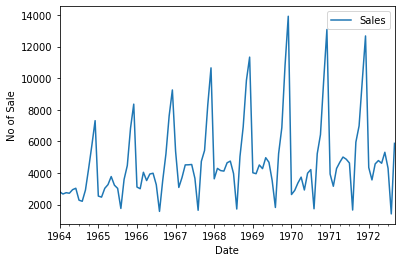

In [249]:
df.plot()
plt.xlabel("Date")
plt.ylabel("No of Sale")

>  Here original data looks like **Seasonal data** and looks pattern occurs similar on every year

In [250]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

> In rolling function, window=12 --> Monthwise aggregation

> In rolling function, window=365 --> Daywise aggregation

> In rolling function, window=52 --> Weakwise aggregation

In [251]:
#Ho: It is non stationary
#H1: It is stationary

#Test stationarity by 
# 1) plotting rolling mean and rolling std graph  #1. Rolling Statistic
# 2) Dickey puller test #2. ACDF (Dickey Fuller) test


def test_stationarity(timeseries):
    
    #1. Determing rolling statistics
    # DATA IS IN month WISE,so rolling this data o year wise. so yearly 12 months. so window =12
    #window=12 MEANS month wise
    rolmean = timeseries.rolling(window=12,center=False).mean() 
    rolstd = timeseries.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
       
    #2. Perform Dickey-Fuller test:
    
    dftest = adfuller(timeseries, autolag='AIC')
    
    """(-2.076340599933076, 
    0.2541339550926388, 
    2, 
    2234, 
    {'1%': -3.4332805415364724, '5%': -2.8628346299364282, '10%': -2.5674591931002038},
    -14013.954809290073)
    """
   
    #Here 1st 4 values are converted to series with giving index name
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    # Here 5th value is a dictionary, is converted to each row and appended to  dfoutput
    for key,value in dftest[4].items():
        #Here appends rows "Critical Value (%s)" to dfoutput
        dfoutput['Critical Value (%s)'%key] = value

        
    print("p value should be less than 0.05. Here p-value is : " ,dftest[1])
    if dftest[1] <= 0.05:
        print("\nStrong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("\nWeak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    
    
    #print dfout
    print('\n Results of Dickey-Fuller Test:')
    print(dfoutput)


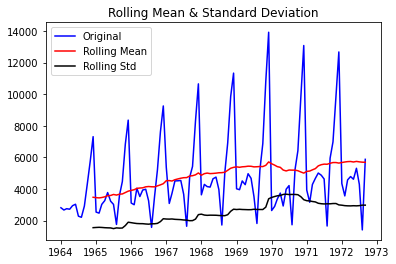

p value should be less than 0.05. Here p-value is :  0.3639157716602417

Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 

 Results of Dickey-Fuller Test:
Test Statistic                 -1.833593
p-value                         0.363916
#Lags Used                     11.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64


In [252]:
test_stationarity(df['Sales'])

> Here mean and STD are not constant, so its not stationary data

<div class="alert alert-info" style="background-color:#7FFF00; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 4. Convert to Stationary by Differencing </h2>
</div>

### 4.1. Do direct difference and check stationarity(Here didnt apply any log or cube etc, just did origibal value difference)
- Here original data looks like Seasonal data and looks patter occurs similar on every year

In [253]:
#This is current month -Prev month value difference
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [254]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

#### This is current month - Prev year same month value difference

In [255]:
# Here original data looks like Seasonal data and looks patter occurs similar on every year, So differencing by 12 as 12 month
# Means here we are differencing jan sale data by last year jan data, feb data by last year feb data like this
# Here we are adding this as new column "Seasonal First Difference"

df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [256]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


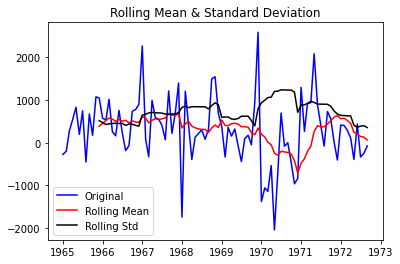

p value should be less than 0.05. Here p-value is :  2.060579696813685e-11

Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary

 Results of Dickey-Fuller Test:
Test Statistic                -7.626619e+00
p-value                        2.060580e-11
#Lags Used                     0.000000e+00
Number of Observations Used    9.200000e+01
Critical Value (1%)           -3.503515e+00
Critical Value (5%)           -2.893508e+00
Critical Value (10%)          -2.583824e+00
dtype: float64


In [257]:
## Again test dickey fuller test
# Here dropna() removes starting 12 nan value rows( Means starts from 1965, instead of 1964)
test_stationarity(df['Seasonal First Difference'].dropna())

> After Differencing data looks like stationary data, (jan to last year jan like this all month differenced)

- Rejects the Null Hyphothesis with p-value<0.05 and Test statistic< 5% critical value
-  2.060580e-11< 0.05 and  -7.626619e+00 <  -2.893508e+00

<AxesSubplot:xlabel='Month'>

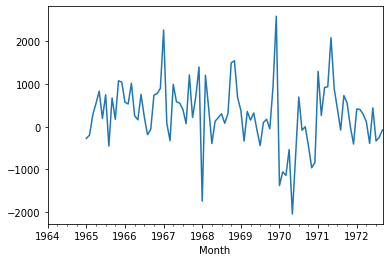

In [258]:
df['Seasonal First Difference'].plot()

#### Here Seasonal differencing d=1, we did 12 months window shift difference, but we did difference only 1 time, so d=1

> This shifted data is used below to check p,q . But final modeling time this data not used. Original data only used and in SARIMA model with value like seasonal_order=(1,1,1,12)



<div class="alert alert-info" style="background-color:#7FFF00; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 5. Automatic Time Series Decomposition </h2>
</div>

- By this approach we comes to know weather our data is trend or seasonal type

- Time series decomposition is a technique that splits a time series into several components, each representing an underlying pattern category, trend, seasonality, and noise.

- The statsmodels library provides an implementation of the naive, or classical, decomposition method in a function called seasonal_decompose(). 
- It requires that you specify whether the model is **additive** or **multiplicative**.
- A review of a plot of the time series and some summary statistics can often be a good start to get an idea of whether your time series problem looks **additive or multiplicative**.
- The seasonal_decompose() function returns a result object. The result object contains arrays to access four pieces of data from the decomposition.

     - **trend** - describes whether the time series is decreasing, constant, or increasing over time.
     - **seasonal** - describes the periodic signal in your time series.
     - **residual/Noise**  - which are the time series after the trend, and seasonal components are removed. (describes what remains behind the separation of seasonality and trend from the time series. )
     In other words, it’s the variability in the data that cannot be explained by the model.
     - **observed** - original or observed data is also stored
     
     
### Additive Model:
- In our plot if the trend and seasonal variation are relatively constant over time, in other words, linear. If yes, then we will select the Additive model.

### Multiplicative Model:
- If the trend and seasonal variation increase or decrease over time then we use the Multiplicative model.


-  Frequently, when looking at time series data it’s difficult to manually extract the trend or identify the seasonality. Fortunately, we can automatically decompose a time series and helps us have a clearer view of the components as It’s easier to analyze the trend if we remove the seasonality from our data and vise versa.

### 1. Apply to Seasonal First Difference

In [259]:
df['Seasonal First Difference'][13:].head()

Month
1965-02-01   -197.0
1965-03-01    276.0
1965-04-01    545.0
1965-05-01    830.0
1965-06-01    194.0
Name: Seasonal First Difference, dtype: float64

In [260]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot


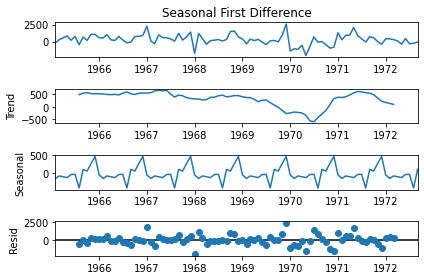

Month
1965-02-01   -197.0
1965-03-01    276.0
1965-04-01    545.0
1965-05-01    830.0
1965-06-01    194.0
Name: Seasonal First Difference, dtype: float64


In [261]:
result = seasonal_decompose(df['Seasonal First Difference'][13:], model='additive')
# result = seasonal_decompose(series, model='multiplicative', period=1)

result.plot()
pyplot.show()
#print(result.trend)
#print(result.seasonal)
#print(result.resid)
print(result.observed.head())

> Here data follows more seasonal  instead of trend and having Nose/Residual

#### Check Residual or Noise is stationary or not

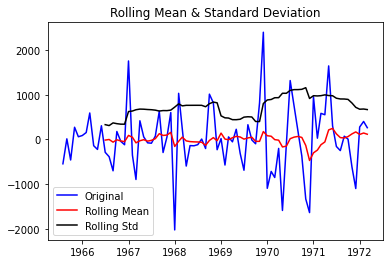

p value should be less than 0.05. Here p-value is :  0.07336558716254807

Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 

 Results of Dickey-Fuller Test:
Test Statistic                 -2.703901
p-value                         0.073366
#Lags Used                     12.000000
Number of Observations Used    67.000000
Critical Value (1%)            -3.531955
Critical Value (5%)            -2.905755
Critical Value (10%)           -2.590357
dtype: float64


In [262]:
test_stationarity(result.resid.dropna())

> After applying shift, Residual still looks like Non Stationary, so we need to have MA (q)

### 2. Apply to Sales data

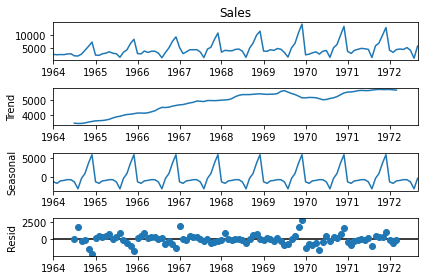

Month
1964-01-01    2815.0
1964-02-01    2672.0
1964-03-01    2755.0
1964-04-01    2721.0
1964-05-01    2946.0
Name: Sales, dtype: float64


In [263]:
result1 = seasonal_decompose(df['Sales'], model='additive')
# result = seasonal_decompose(series, model='multiplicative', period=1)

result1.plot()
pyplot.show()
#print(result.trend)
#print(result.seasonal)
#print(result.resid)
print(result1.observed.head())

> Here data follows more seasonal and littel rend and having Nose/Residual

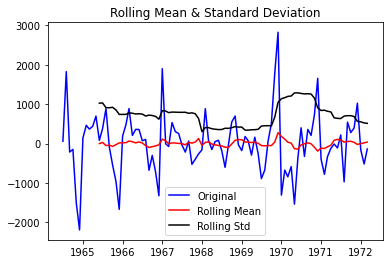

p value should be less than 0.05. Here p-value is :  0.00040457256368791586

Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary

 Results of Dickey-Fuller Test:
Test Statistic                 -4.323381
p-value                         0.000405
#Lags Used                     11.000000
Number of Observations Used    81.000000
Critical Value (1%)            -3.513790
Critical Value (5%)            -2.897943
Critical Value (10%)           -2.586191
dtype: float64


In [264]:
# Check Residual or Noise is stationary or not
test_stationarity(result1.resid.dropna())

<div class="alert alert-info" style="background-color:#7FFF00; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 5. Find p, q, d using PACF, ACF </h2>
</div>

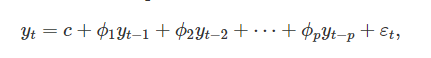

**Here we are plotting autocorrelation_plot**
- The horizontal lines in the plot correspond to 95% and 99% confidence bands.
- The dashed line is 99% confidence band.

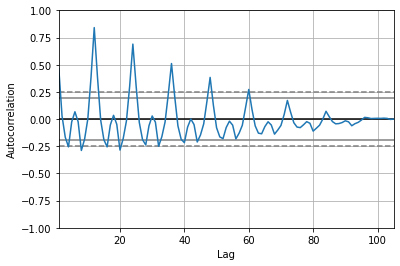

In [265]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()
# Here X-axis is lag value,means how many prev value to consider

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF **“shuts off”** past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
- where it crosses 0 confidence level in graph,that x axis value  will becomes p values log.  


    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does **"not shut off"**, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
- where it crosses upper confidence level in graph,that x axis value  will becomes q values log. 
    
    (p,d,q)
- p AR model lags
- d differencing
- q MA lags

### Method 1: To find p & q:

In [266]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

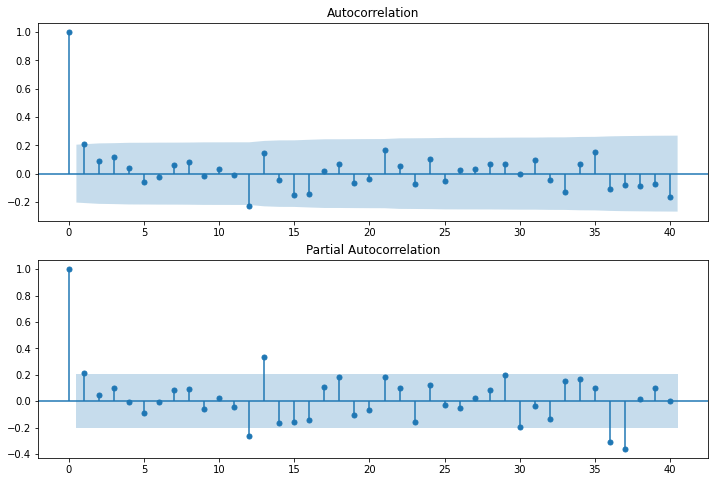

In [267]:
#iloc[13:]: Ignore 1st 12 records which has null
#lags=40 : Consider 40 lags value


# plot_acf for MA
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)

# plot_pacf for AR
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

#### How to understand this Graph:

> 1st is Autocorrelation graph, where that graph drops exponentially down 1st time, that particular X value is q of MA model
- Here q=1

> 2nd is Partial Autocorrelation graph, where that graph drops suddenly down 1st time, that particular X value is p of AR model

- Here p=1

### Method 2: To find p & q:

In [268]:
from statsmodels.tsa.stattools import adfuller, acf, pacf

#Ignore 1st 12 records which has null
lag_acf = acf(df['Seasonal First Difference'].iloc[13:], nlags=10)
lag_pacf = pacf(df['Seasonal First Difference'].iloc[13:], nlags=10, method='ols')

C:\Users\prabh\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


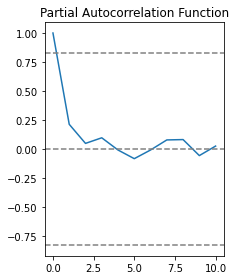

In [269]:
#PACF
# where it crosses 0 confidence level in graph,that x axis value will becomes p values log.

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(df['Seasonal First Difference'].iloc[13:])),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(df['Seasonal First Difference'].iloc[13:])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Text(0.5, 1.0, 'Autocorrelation Function')

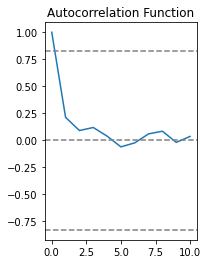

In [270]:
#Plot ACF: 
#where it crosses upper confidence level in graph,that x axis value  will becomes q values log. 

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(df['Seasonal First Difference'].iloc[13:])),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(df['Seasonal First Difference'].iloc[13:])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

<div class="alert alert-info" style="background-color:#7FFF00; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 6. Apply Auto Regressive Integrated Moving Average (ARIMA) Model </h2> </div>

### 6.1 Apply ARIMA to Non Stationary Original data 

### Condition: ARIMA Should be used if a data is Non - Seasonal, but data is  Seasonal here, but still we are applying and checking

In [271]:
# For non-seasonal data
#p=1, d=1, q=0 or 1 
from statsmodels.tsa.arima_model import ARIMA

In [272]:
# Here we are not applying on stationary or conveted data, we are applying on original data 'Sales'

model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\prabh\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\prabh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [273]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Fri, 24 Sep 2021   AIC                           1910.251
Time:                        12:03:56   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7853     12.405      1.837      0.066      -1.529      47.099
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

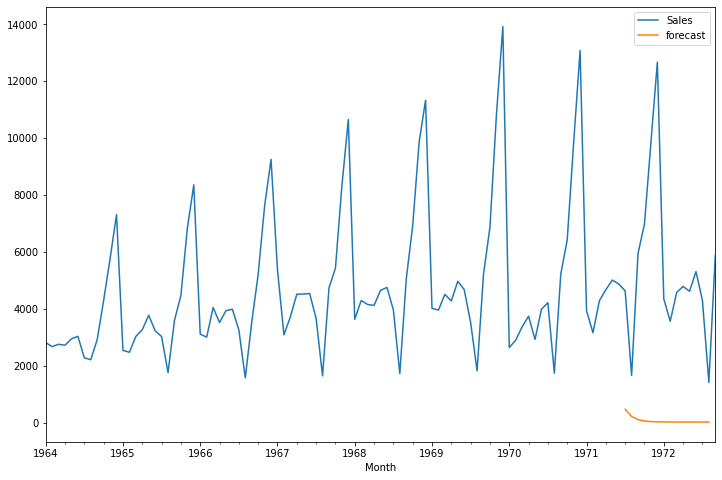

In [274]:
# Add a new column as forecast correspondings to same years from start=90,end=103
# Means predicted value from 90th month to 103 months--> 12 months
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

> **Conclusion:** Here we can see predicted/forecasted orange line is not at all sync with blue actual line 

                 0
count   104.000000
mean     87.782249
std    2257.897218
min   -6548.792614
25%    -821.184311
50%     -87.552723
75%    1221.505757
max    6177.217149


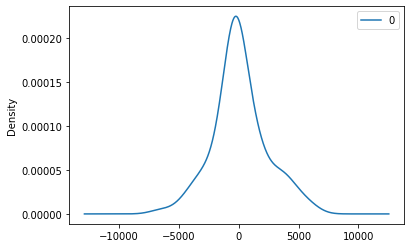

In [325]:
# ARIMA RESIDUAL ERROR 
residuals_ARIMA = pd.DataFrame(model_fit.resid)
residuals_ARIMA.plot(kind='kde')
print(residuals_ARIMA.describe())


## Residual Sum Of Square:

In [275]:
df_shifted_value = df['Sales'] - df['Sales'].shift()
print(df_shifted_value.head())
# fittedvalues Always starts from 2nd month and here we need to remove NAN value(1st month)
df_shifted_value.dropna(inplace=True)
df_shifted_value.head()

Month
1964-01-01      NaN
1964-02-01   -143.0
1964-03-01     83.0
1964-04-01    -34.0
1964-05-01    225.0
Name: Sales, dtype: float64


Month
1964-02-01   -143.0
1964-03-01     83.0
1964-04-01    -34.0
1964-05-01    225.0
1964-06-01     90.0
Name: Sales, dtype: float64

In [276]:
df['Sales'].head()

Month
1964-01-01    2815.0
1964-02-01    2672.0
1964-03-01    2755.0
1964-04-01    2721.0
1964-05-01    2946.0
Name: Sales, dtype: float64

C:\Users\prabh\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\prabh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS wi

Text(0.5, 1.0, 'RSS: 525905679.3745')

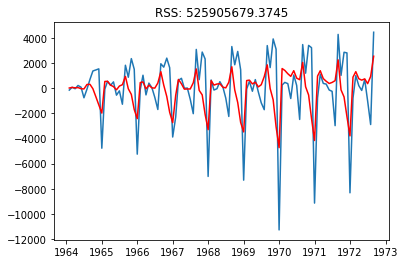

In [294]:
#Here fit the model with original data
model_arima=ARIMA(df['Sales'],order=(1,1,1))
model_fit_arima=model_arima.fit(dip=-1)


# Plot the ARIMA model
#Normally we plot 2 graph. 1. original fitted data with shift 2. fittedvalues
# RSS Calculated by this difference only
plt.plot(df_shifted_value)
plt.plot(model_fit_arima.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((model_fit_arima.fittedvalues-df_shifted_value)**2))

In [295]:
# fittedvalues Always starts from 2nd month
print(model_fit_arima.fittedvalues.head())
print(df_shifted_value.head())

Month
1964-02-01    22.785270
1964-03-01    69.673843
1964-04-01    38.551165
1964-05-01    57.566012
1964-06-01   -31.199356
dtype: float64
Month
1964-02-01   -143.0
1964-03-01     83.0
1964-04-01    -34.0
1964-05-01    225.0
1964-06-01     90.0
Name: Sales, dtype: float64


> RSS value is too high

### 6.2 Apply SARIMA to Non Stationary data 
- Here SARIMAX will do auto Difference/Transform based on value providedin seasonal_order

- Here seasonal_order=(1,1,1,12) = (p,d,q,differencing window value)

In [279]:
import statsmodels.api as sm

In [280]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
sarima_model_fit=model.fit()

C:\Users\prabh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\prabh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [281]:
sarima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Fri, 24 Sep 2021   AIC                           1486.804
Time:                                    12:03:58   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

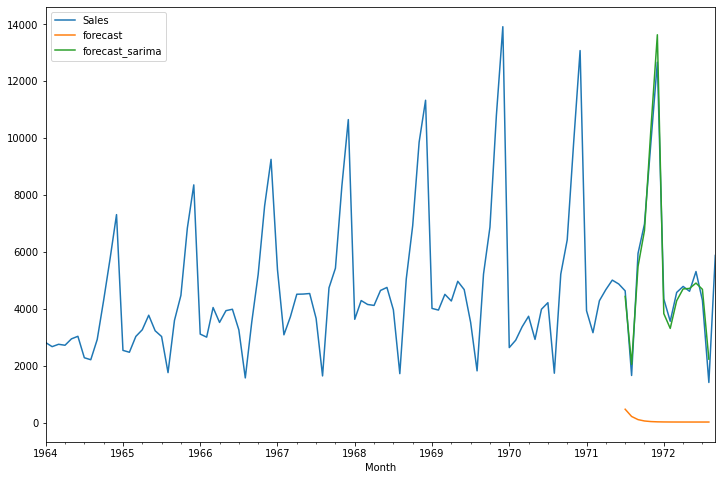

In [282]:
# Add a new column as forecast_sarima correspondings to same years from start=90,end=103
# Means predicted value from 90th month to 103 months(Last 1 year)--> 12 months

df['forecast_sarima']=sarima_model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast', 'forecast_sarima']].plot(figsize=(12,8))

> **Conclusion:** Here we can see predicted/forecasted Green line is good sync with blue actual line 

                 0
count   105.000000
mean    -69.284238
std     996.587080
min   -6006.397992
25%    -475.852213
50%     -83.469253
75%     306.809150
max    2815.000000


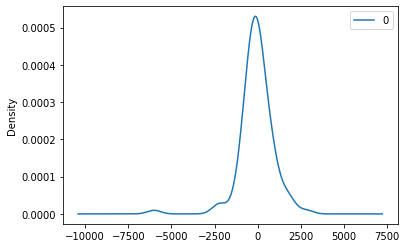

In [326]:
#ARIMA RESIDUAL ERROR 
residuals = pd.DataFrame(sarima_model_fit.resid)
residuals.plot(kind='kde')
print(residuals.describe())
#iTS CENTERED AT 0, ITS GOOD MODEL

C:\Users\prabh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\prabh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 95871131.0677')

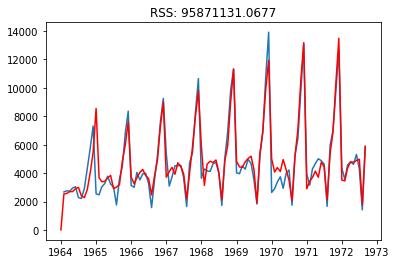

In [322]:
# Plot RSS
#Here fit the model with original data
model_sarima2=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
model_fit_sarima2=model_sarima2.fit(dip=-1)


# Plot the ARIMA model
#Normally we plot 2 graph. 1. original fitted data with shift 2. fittedvalues
# RSS Calculated by this difference only
plt.plot(df['Sales'][1:])
plt.plot(model_fit_sarima2.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((model_fit_sarima2.fittedvalues[1:]-df['Sales'][1:])**2))

> Here something wrong in my code. fittedvalues and actual value almost nearby, still RSS is too huge

In [312]:
model_fit_sarima2.fittedvalues[1:7]-df['Sales'][1:7]

Month
1964-02-01   -144.284763
1964-03-01   -187.124163
1964-04-01    -27.190006
1964-05-01   -246.764337
1964-06-01   -138.769504
1964-07-01    716.464941
dtype: float64

In [313]:
model_fit_sarima2.fittedvalues[1:].head()

Month
1964-02-01    2527.715237
1964-03-01    2567.875837
1964-04-01    2693.809994
1964-05-01    2699.235663
1964-06-01    2897.230496
dtype: float64

<div class="alert alert-info" style="background-color:#7FFF00; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 7. Create Forecasted New data </h2>
</div>

- Here we create new DF which having next 2 year months

In [315]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [316]:
#Create a new Future dates related DF with columns same as df/Original df
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [317]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast,forecast_sarima
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [318]:
# Concatenate bOth the DF
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

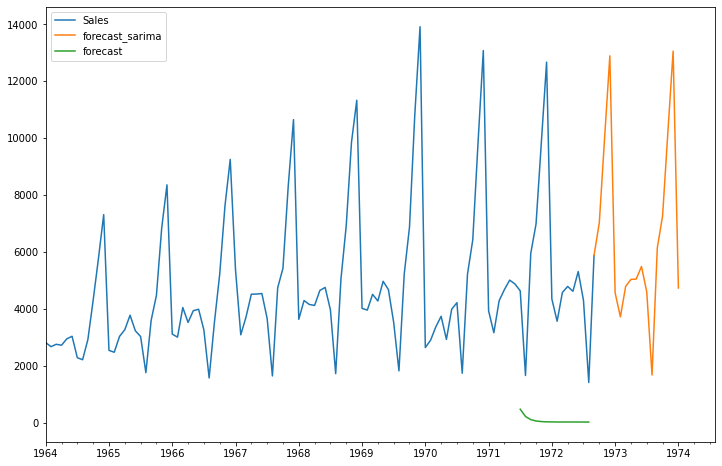

In [319]:
# Update forecast_sarima correspondings to same years from start=104,end=120
# Means predicted value from 104th month to 120 months(Last 1.5 year)--> 16 months

future_df['forecast_sarima'] = sarima_model_fit.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast_sarima','forecast']].plot(figsize=(12, 8)) 

<div class="alert alert-info" style="background-color:#7FFF00; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 8. Conclusion </h2>
</div>

- Here we created Forecasting SARIMA model which do 2 or 1.5 year Forecast

#### Reference:
@krish naik youtube channel

https://www.youtube.com/watch?v=2XGSIlgUBDI

https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average